# Importing all necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install lazypredict


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install scikit-learn==1.0.2


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [33 lines of output]
  Traceback (most recent call last):
    File "C:\Users\sanne.hruthika\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\sanne.hruthika\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\sanne.hruthika\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
      backend = _build_backend()
                ^^^^^^^^^^^^^^^^
    File "C:\Users\sanne.hruthika\AppData\Local\Programs\Python\Python312\Lib\site-packag


  Using cached scikit-learn-1.0.2.tar.gz (6.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


In [6]:
pip install --upgrade lazypredict


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Importing the datasets 

In [8]:
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')
print(train_df.shape)
print(test_df.shape)

(614, 13)
(367, 12)


# Exploratory Data Analysis

In [9]:
print("Training data overview:")
print(train_df.info())
print(train_df.describe())

Training data overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count   

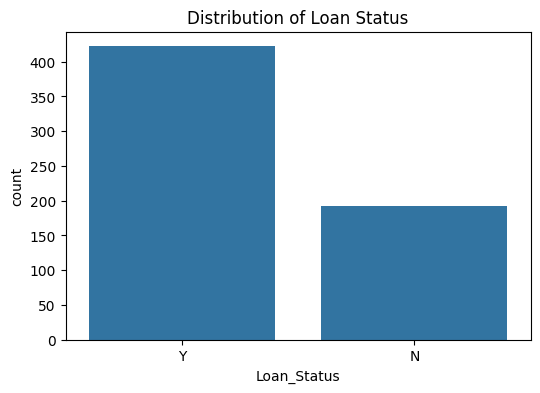

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status', data=train_df)
plt.title('Distribution of Loan Status')
plt.show()

# Missing Values

In [11]:
print("Missing values in training set:\n", train_df.isnull().sum())

Missing values in training set:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


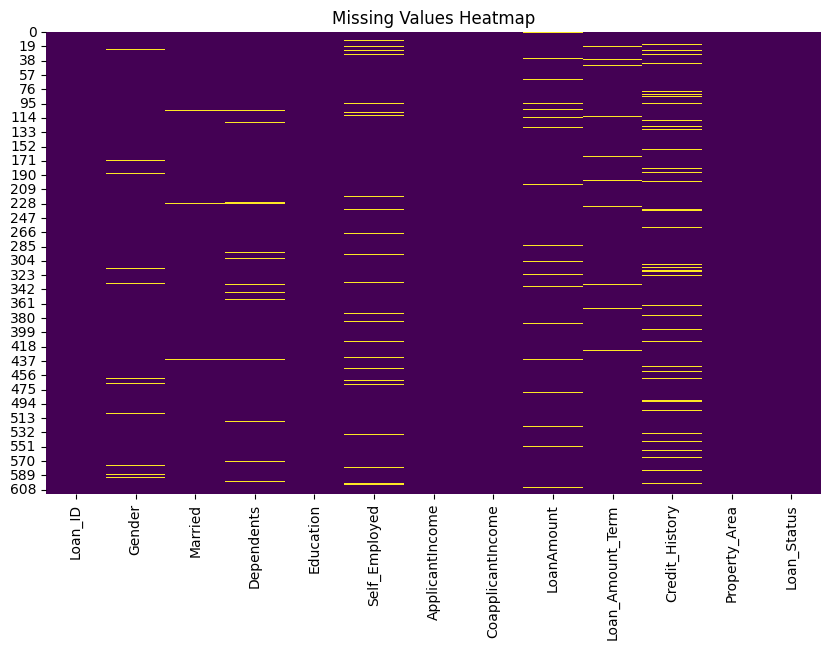

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Handling Missing Values

In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
train_df['LoanAmount'] = imputer.fit_transform(train_df[['LoanAmount']])
train_df['Loan_Amount_Term'] = imputer.fit_transform(train_df[['Loan_Amount_Term']])


In [14]:
imputer_frequent = SimpleImputer(strategy='most_frequent')
train_df['Credit_History'] = imputer_frequent.fit_transform(train_df[['Credit_History']])

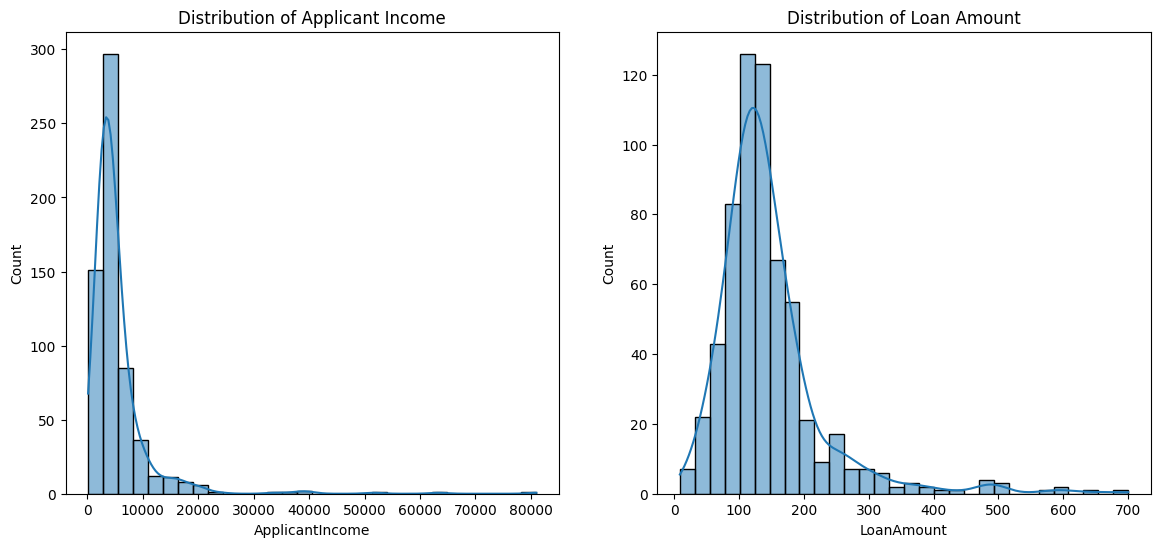

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.histplot(train_df['ApplicantIncome'], kde=True, bins=30)
plt.title('Distribution of Applicant Income')

plt.subplot(1, 2, 2)
sns.histplot(train_df['LoanAmount'], kde=True, bins=30)
plt.title('Distribution of Loan Amount')
plt.show()

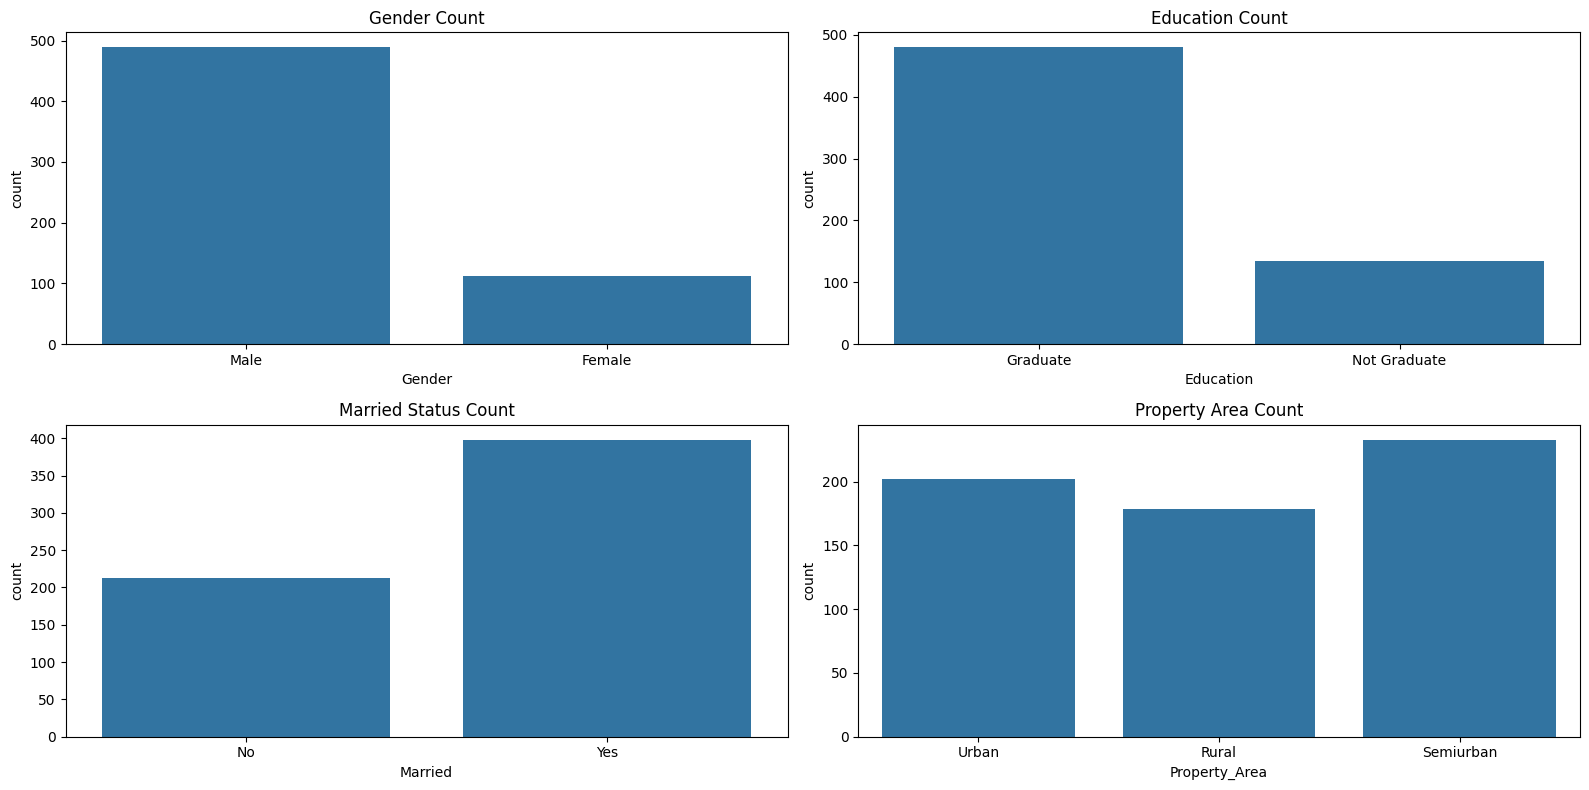

In [16]:
plt.figure(figsize=(16,8))

plt.subplot(2, 2, 1)
sns.countplot(x='Gender', data=train_df)
plt.title('Gender Count')

plt.subplot(2, 2, 2)
sns.countplot(x='Education', data=train_df)
plt.title('Education Count')

plt.subplot(2, 2, 3)
sns.countplot(x='Married', data=train_df)
plt.title('Married Status Count')

plt.subplot(2, 2, 4)
sns.countplot(x='Property_Area', data=train_df)
plt.title('Property Area Count')

plt.tight_layout()
plt.show()


# Handling categorical columns with Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']

for col in categorical_columns:
    train_df[col] = le.fit_transform(train_df[col].astype(str))

# Features and Target

In [18]:
X = train_df.drop(columns=['Loan_ID', 'Loan_Status'])  
y = train_df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)  
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing Features

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Model building

In [20]:
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_reshaped = np.reshape(X_val_scaled, (X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))

In [23]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=False))
model.add(Dropout(0.3))  
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid')) 


In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [25]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [30]:
history = model.fit(X_train_reshaped, y_train, validation_data=(X_val_reshaped, y_val),
                    epochs=5, batch_size=32, callbacks=[early_stopping])

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8296 - loss: 0.4391 - val_accuracy: 0.7886 - val_loss: 0.4981
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8341 - loss: 0.4387 - val_accuracy: 0.7886 - val_loss: 0.5003
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7996 - loss: 0.4784 - val_accuracy: 0.7886 - val_loss: 0.5006
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8414 - loss: 0.4268 - val_accuracy: 0.7886 - val_loss: 0.5033
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8219 - loss: 0.4321 - val_accuracy: 0.7886 - val_loss: 0.5039


In [32]:
val_loss, val_accuracy = model.evaluate(X_val_reshaped, y_val)
print(f"LSTM Validation Accuracy: {val_accuracy}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7998 - loss: 0.4789 
LSTM Validation Accuracy: 0.7886179089546204


In [33]:
y_pred_lstm = (model.predict(X_val_reshaped) > 0.5).astype("int32")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_lstm))
print("Classification Report:\n", classification_report(y_val, y_pred_lstm))


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [34]:
test_df['LoanAmount'] = imputer.fit_transform(test_df[['LoanAmount']])
test_df['Loan_Amount_Term'] = imputer.fit_transform(test_df[['Loan_Amount_Term']])
test_df['Credit_History'] = imputer_frequent.fit_transform(test_df[['Credit_History']])

In [35]:
for col in categorical_columns:
    test_df[col] = le.fit_transform(test_df[col].astype(str))

In [36]:
X_test = test_df.drop(columns=['Loan_ID'])
X_test_scaled = scaler.transform(X_test)
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [37]:
test_predictions = (model.predict(X_test_reshaped) > 0.5).astype("int32")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [39]:
submission = pd.DataFrame({'Loan_ID': test_df['Loan_ID'], 'Loan_Status': ['Y' if pred == 1 else 'N' for pred in test_predictions]})
submission.to_csv('loan_predictions_lstm.csv', index=False)
print("Submission file created.")

Submission file created.
